In [14]:
from sklearn.datasets import make_regression  ## just for dataset creation
from sklearn.model_selection import train_test_split ## for splitting the dataset
from sklearn.metrics import mean_squared_error ## for calculating the error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
x,y = make_regression(n_samples=500, n_features=1, noise=15, random_state=6666)  ## create dataset with some randomness and reproducibility

In [16]:
class LinearRegression:
    def __init__(self, lr:int=0.01, iter:int=1000) -> None:
        self.lr = lr
        self.iter = iter
        self.weights = None
        self.bias = None
    
    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for _ in range(self.iter):
            y_pred = np.dot(x, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self
    
    def predict(self, x):
        return np.dot(x, self.weights) + self.bias

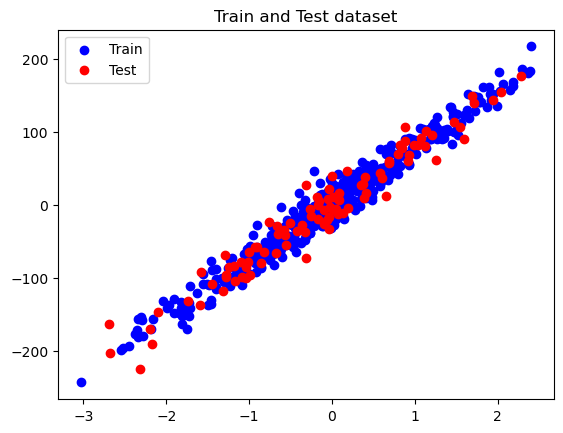

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6666)

plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.legend(['Train', 'Test'])
plt.title('Train and Test dataset')
plt.show()

Mean Squared Error: 334.50116441729455
Weights: 77.82991201072505
Bias: 1.568253904841114


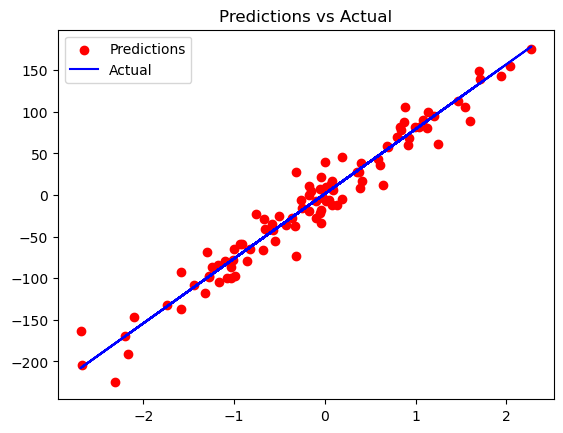

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Weights: {model.weights[0]}')
print(f'Bias: {model.bias}')

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, predictions, color='blue')
plt.legend(['Predictions', 'Actual'])
plt.title('Predictions vs Actual')
plt.show()